# Pre-Lab ELN Final Dataset Production

### Name: Kylie Joyce


### Date: 02/22/22


### PID: 730333803


### Jupyter Notebook Number: 5

## Purpose/Objective:
The objective of this notebook is to breakdown the very broad dataset provided by Allen Brain Institute Atlas data into the specific datasets we want to focus on (VIP inhibitory neuron data of males when viewing familiar images, VIP inhibitory neuron data of females when viewing familiar images, VIP inhibitory neuron data of males when viewing novel images, and VIP inhibitory neuron data of females when viewing novel images). This will allow us to get a good idea of how many data points we are working with as well as get an idea of how our figure 1 panels may look (since this was focused on the breakdown of our data into the final datasets). 

## Protocol:
1. Import allensdk data 
2. Filter and save sessions by sex (one list for males, one list for females).
3. Breakdown the data into excitatory and inhibitory neuron data.
4. Save all information of inhibitory neuron trials: one for males and one for females.
5. Analyze the data into VISp ONLY data points.
6. Further breakdown these lists into 2 lists each: one containing data when viewing novel images and one containing data when viewing familiar images.
7. Trouble shoot any failures with syntax/errors. 
8. If we finish early and everything works, we will look to see if we should focus on the depth of the cells within the V1 area as another variable. (need to see amount of depths in each sex and and how much data falls into each depth per sex). 

## Expected Results:
We expect to find a good amount of data in each category listed in the objective above. These numbers should be more than 5 (which we consider to be quite small of an n) but will not be outrageous numbers (like over 1000 data points to work with). Having these data sets broken down and defined gives us a much better understanding of what we are actually working with and will allow us to further narrow/expand the borders of our research as needed.

### As a note, this prelab was not broken up into individual portions because separating the data heavily relies on havin previously split data (aka splitting inhibitory from excitatory specifically in males and females separately. This also was worked on intensly by all members and we tried to trouble shoot any for loop issues before hand but want to be able to trouble shoot together if anything goes wrong during lab. 

### Installing AllenSDK into your local environment. 

In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.1.6.2 requires h5py~=2.7, but you have h5py 3.6.0 which is incompatible.
deeplabcut 2.1.6.2 requires matplotlib==3.0.3, but you have matplotlib 3.1.1 which is incompatible.
deeplabcut 2.1.6.2 requires numpy==1.16.4, but you have numpy 1.21.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### Import Packages:

In [2]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

### If working with Visual Coding: Neuropixels Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [3]:
#this code block should only be run if you are working with the neuropixels data
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

data_directory = '/overflow/NSCI274/projects/ecephysdata/' 

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

### If working with Visual Coding: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [4]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

### If working with Visual Behavior: 2P Ca2+ Imaging Data use the following code block to import the cache object and point it to the data already downloaded and stored on LongLeaf.  Do not change this code.

In [5]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

In [77]:
ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")

print(ophys_experiments.columns)

ophys_experiments.head(10)

Total number of ophys experiments: 1941

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'session_type', 'experience_level', 'passive',
       'image_set', 'file_id'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920
951980479,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028354,VisualBehaviorMultiscope,150,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400977
951980484,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028351,VisualBehaviorMultiscope,75,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400876
953659752,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012413
953659743,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012706


### To filter and sort the data into two lists, one for each sex.

In [79]:
M_ophys_exp_data = ophys_experiments[ophys_experiments.sex == 'M']
type(M_ophys_exp_data)
print("Total Number of Males is: " + str(len(M_ophys_exp_data)))

F_ophys_exp_data = ophys_experiments[ophys_experiments.sex == 'F']
print("Total Number of Females is: " + str(len(F_ophys_exp_data)))
M_ophys_exp_data

Total Number of Males is: 1267
Total Number of Females is: 674


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
993862620,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,194.0,Sst-IRES-Cre,GCaMP6f,1.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-11 19:01:03.000000,OPHYS_1_images_B,Familiar,False,B,993906653
994053903,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,195.0,Sst-IRES-Cre,GCaMP6f,2.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-12 20:47:45.000000,OPHYS_2_images_B_passive,Familiar,True,B,994098960
994278281,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,196.0,Sst-IRES-Cre,GCaMP6f,3.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-13 20:34:10.000000,OPHYS_3_images_B,Familiar,False,B,994320564
994790561,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,199.0,Sst-IRES-Cre,GCaMP6f,3.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-16 21:20:41.000000,OPHYS_3_images_B,Familiar,False,B,994831840
994955425,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,200.0,Sst-IRES-Cre,GCaMP6f,4.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-17 19:02:07.000000,OPHYS_4_images_A,Novel 1,False,A,995003435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962473308,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467954,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,174.0,Vip-IRES-Cre,GCaMP6f,3.0,...,969421516,VisualBehaviorTask1B,175,VISp,2019-10-07 15:16:44.000000,OPHYS_3_images_B,Familiar,False,B,962685182
963394081,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467954,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,175.0,Vip-IRES-Cre,GCaMP6f,2.0,...,969421516,VisualBehaviorTask1B,175,VISp,2019-10-08 15:27:11.000000,OPHYS_2_images_B_passive,Familiar,True,B,963457965
964440177,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467954,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,176.0,Vip-IRES-Cre,GCaMP6f,4.0,...,969421516,VisualBehaviorTask1B,175,VISp,2019-10-09 15:26:19.000000,OPHYS_4_images_A,Novel 1,False,A,964778206


### Bar Graph of Male and Female Data

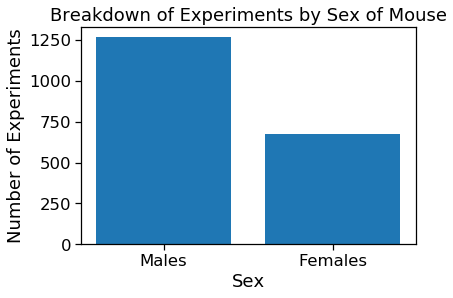

In [8]:
Sexes = ['Males','Females']
num_of_exp = [len(M_ophys_exp_data),len(F_ophys_exp_data)]

plt.bar(Sexes, num_of_exp)
plt.title('Breakdown of Experiments by Sex of Mouse')
plt.xlabel('Sex')
plt.ylabel('Number of Experiments')
plt.show()

### In order to know what genotypes are a part of the dataset, we will use the unique function to pull out the exact names of each genotype.

In [9]:
M_ophys_exp_data.full_genotype.unique()

array(['Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
       'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
       'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt',
       'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt'],
      dtype=object)

In [10]:
F_ophys_exp_data.full_genotype.unique()

array(['Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
       'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
       'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
       'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt'],
      dtype=object)

### Get a count of how many data points are excitatory neurons or inhibitory neurons.

#### Males

In [11]:
M_Excitatory_ophys_exp_id = (M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt']
                + M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt'])

print("Total Number of Male Neurons that are Excitatory is: " + str(len(M_Excitatory_ophys_exp_id)))

M_Inhibitory_ophys_exp_id = (M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']
                + M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'])

print("Total Number of Male Neurons that are Inhibitory is: " + str(len(M_Inhibitory_ophys_exp_id)))

Total Number of Male Neurons that are Excitatory is: 36
Total Number of Male Neurons that are Inhibitory is: 705


#### Females

In [12]:
F_Excitatory_ophys_exp_id = (F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt']
                + F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt'])

print("Total number of inhibitory neurons measured for females is: " + str(len(F_Excitatory_ophys_exp_id)))

F_Inhibitory_ophys_exp_id = (F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']
                + F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'])

print("Total number of inhibitory neurons measured for females is: " + str(len(F_Inhibitory_ophys_exp_id)))

Total number of inhibitory neurons measured for females is: 20
Total number of inhibitory neurons measured for females is: 365


In [80]:
M_Inhibitory_ophys_exp_id

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
803736273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805784331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808621958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809497730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102479797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102479801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1102479805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Store the data for each index point that returns a mouse that has the excitatory genotypes in the case we need/decide to pursue this route of research as well.

#### Males 

In [13]:
M_Excitatory_ophys_exp_tot = []
for i in range(len(M_ophys_exp_data)):
    full_genotype = M_ophys_exp_data.iloc[i,1]
    x = M_ophys_exp_data.iloc[i].array
    if full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt':
        M_Excitatory_ophys_exp_tot.append(x)
    elif full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt':
        M_Excitatory_ophys_exp_tot.append(x)
print("The number of excitatory neurons measured for males is: " + str(len(M_Excitatory_ophys_exp_tot)))

The number of excitatory neurons measured for males is: 36


#### Females

In [14]:
F_Excitatory_ophys_exp_tot = []

for i in range(len(F_ophys_exp_data)):
    full_genotype = F_ophys_exp_data.iloc[i,1]
    x = F_ophys_exp_data.iloc[i].array
    if full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt':
        F_Excitatory_ophys_exp_tot.append(x)
    elif full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt':
        F_Excitatory_ophys_exp_tot.append(x)
print("The number of excitatory neurons measured for females is: " + str(len(F_Excitatory_ophys_exp_tot)))

The number of excitatory neurons measured for females is: 20


### Store the data for each index that returns a mouse that has the inhibitory genotypes we are primarily interested in.

#### Males

In [15]:
M_Inhibitory_ophys_exp_tot = []

for i in range(len(M_ophys_exp_data)):
    full_genotype = M_ophys_exp_data.iloc[i,1]
    x = M_ophys_exp_data.iloc[i].array
    if full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        M_Inhibitory_ophys_exp_tot.append(x)
    elif full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        M_Inhibitory_ophys_exp_tot.append(x)
print("The number of inhibitory neurons measured for males is: " + str(len(M_Inhibitory_ophys_exp_tot)))

The number of inhibitory neurons measured for males is: 705


#### Females

In [16]:
F_Inhibitory_ophys_exp_tot = []

for i in range(len(F_ophys_exp_data)):
    full_genotype = F_ophys_exp_data.iloc[i,1]
    x = F_ophys_exp_data.iloc[i].array
    if full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        F_Inhibitory_ophys_exp_tot.append(x)
    elif full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        F_Inhibitory_ophys_exp_tot.append(x)
print("The number of inhibitory neurons measured for females is: " + str(len(F_Inhibitory_ophys_exp_tot)))

The number of inhibitory neurons measured for females is: 365


#### Bar Graph of Cell Type

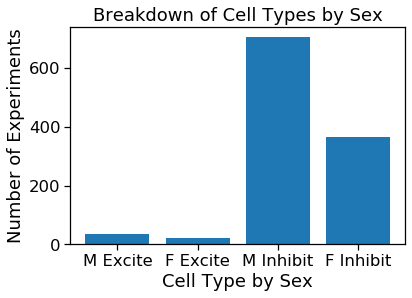

In [17]:
Cells = ['M Excite','F Excite', 'M Inhibit', 'F Inhibit']
num_of_cells = [len(M_Excitatory_ophys_exp_tot),len(F_Excitatory_ophys_exp_tot), len(M_Inhibitory_ophys_exp_tot), len(F_Inhibitory_ophys_exp_tot)]

plt.bar(Cells, num_of_cells)
plt.title('Breakdown of Cell Types by Sex')
plt.xlabel('Cell Type by Sex')
plt.ylabel('Number of Experiments')
plt.show()

Definitely need to fix this. Would like to figure out having the bars for each sex together and having the sexes differentiated by color instead of an x label.

### Find what index in this list returns the targeted structure, the session type, and the imaging depth column index.

In [18]:
print(F_Inhibitory_ophys_exp_tot[0])

<PandasArray>
[                                       'MESO.1',
 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
                                          457841,
                    'Ai148(TIT2L-GC6f-ICL-tTA2)',
                                ['Sst-IRES-Cre'],
                                             'F',
                                           206.0,
                                  'Sst-IRES-Cre',
                                       'GCaMP6f',
                                             1.0,
                                             0.0,
                                            65.0,
                                             0.0,
                                       951410079,
                                       951520319,
                                      1018028360,
                      'VisualBehaviorMultiscope',
                                             300,
                                          'VISl',
                    '2019-09-20 09:4

#### targeted_structure is index 18, session_type is index 20, and the imaging_depth index is 17

### Separate the data into the VISp data for each sex 

##### We will have to fill in the indices found in the cell above.

##### !!IOET stands for inhibitory_ophys_exp_tot so we can keep consistent names but have short accurrate variable names!!

#### Males

In [19]:
M_IOET_VISp = []

for i in range(len(M_Inhibitory_ophys_exp_tot)):
    target_structure = M_Inhibitory_ophys_exp_tot[i][18]
    x = M_Inhibitory_ophys_exp_tot[i]
    if target_structure == 'VISp':
        M_IOET_VISp.append(x)
print("The number of inhibitory neurons measured for males in the VISp is: " + str(len(M_IOET_VISp)))

The number of inhibitory neurons measured for males in the VISp is: 391


#### Females

In [20]:
F_IOET_VISp = []

for i in range(len(F_Inhibitory_ophys_exp_tot)):
    target_structure = F_Inhibitory_ophys_exp_tot[i][18]
    x = F_Inhibitory_ophys_exp_tot[i]
    if target_structure == 'VISp':
        F_IOET_VISp.append(x)
print("The number of inhibitory neurons measured for females in the VISp is: " + str(len(F_IOET_VISp)))

The number of inhibitory neurons measured for females in the VISp is: 155


### Split data into the respective novel and familiar image trials per sex.

##### IOETV now stands for inhibitory_ophys_exp_tot_visp

#### Males

##### Familiar

In [82]:
M_IOETV_Familiar = []

for i in range(len(M_IOET_VISp)):
    session_type = M_IOET_VISp[i][20]
    x = M_IOET_VISp[i]
    if session_type == 'OPHYS_2_images_A_passive':
        M_IOETV_Familiar.append(x)
    elif session_type == 'OPHYS_2_images_B_passive':
        M_IOETV_Familiar.append(x)
print("The number of trials for males passively viewing familiar images is: " + str(len(M_IOETV_Familiar)))

The number of trials for males passively viewing familiar images is: 51


##### Novel

In [22]:
M_IOETV_Novel = []

for i in range(len(M_IOET_VISp)):
    session_type = M_IOET_VISp[i][20]
    x = M_IOET_VISp[i]
    if session_type == 'OPHYS_5_images_A_passive':
        M_IOETV_Novel.append(x)
    elif session_type == 'OPHYS_5_images_B_passive':
        M_IOETV_Novel.append(x)
print("The number of trials males passively viewing novel images is: " + str(len(M_IOETV_Novel)))

The number of trials males passively viewing novel images is: 48


#### Females

##### Familiar

In [23]:
F_IOETV_Familiar = []

for i in range(len(F_IOET_VISp)):
    session_type = F_IOET_VISp[i][20]
    x = F_IOET_VISp[i]
    if session_type == 'OPHYS_2_images_A_passive':
        F_IOETV_Familiar.append(x)
    elif session_type == 'OPHYS_2_images_B_passive':
        F_IOETV_Familiar.append(x)
print("The number of trials for females passively viewing familiar images is: " + str(len(F_IOETV_Familiar)))

The number of trials for females passively viewing familiar images is: 11


##### Novel

In [24]:
F_IOETV_Novel = []

for i in range(len(F_IOET_VISp)):
    session_type = F_IOET_VISp[i][20]
    x = F_IOET_VISp[i]
    if session_type == 'OPHYS_5_images_A_passive':
        F_IOETV_Novel.append(x)
    elif session_type == 'OPHYS_5_images_B_passive':
        F_IOETV_Novel.append(x)
print("The number of trials females passively viewing novel images is: " + str(len(F_IOETV_Novel)))

The number of trials females passively viewing novel images is: 13


### If we have time, separate the data to see how many depths in the V1 were measured from

In [25]:
Depths_M_Familiar = set()

for i in range(len(M_IOETV_Familiar)):
    Depths_M_Familiar.add(M_IOETV_Familiar[i][17])

print("There are " + str(len(Depths_M_Familiar)) + " different levels of imaging in the V1 area for inhibitory male neurons passively viewing familiar images.")
print("They are "+ str(Depths_M_Familiar))

Depths_M_Novel = set()

for i in range(len(M_IOETV_Novel)):
    Depths_M_Novel.add(M_IOETV_Novel[i][17])

print("There are " + str(len(Depths_M_Novel)) + " different levels of imaging in the V1 area for inhibitory male neurons passively viewing novel images.")
print("They are "+ str(Depths_M_Novel))

Depths_F_Familiar = set()

for i in range(len(F_IOETV_Familiar)):
    Depths_F_Familiar.add(F_IOETV_Familiar[i][17])

print("There are " + str(len(Depths_F_Familiar)) + " different levels of imaging in the V1 area for inhibitory female neurons passively viewing familiar images.")
print("They are "+ str(Depths_F_Familiar))

Depths_F_Novel = set()

for i in range(len(F_IOETV_Novel)):
    Depths_F_Novel.add(F_IOETV_Novel[i][17])

print("There are " + str(len(Depths_F_Novel)) + " different levels of imaging in the V1 area for inhibitory female neurons passively viewing novel images.")
print("They are "+ str(Depths_F_Novel))

There are 22 different levels of imaging in the V1 area for inhibitory male neurons passively viewing familiar images.
They are {145, 274, 275, 150, 152, 158, 290, 175, 306, 310, 183, 71, 73, 75, 83, 213, 348, 221, 223, 225, 229, 235}
There are 22 different levels of imaging in the V1 area for inhibitory male neurons passively viewing novel images.
They are {274, 275, 147, 150, 152, 154, 158, 160, 290, 175, 304, 315, 71, 75, 79, 217, 221, 350, 225, 227, 232, 233}
There are 5 different levels of imaging in the V1 area for inhibitory female neurons passively viewing familiar images.
They are {225, 75, 175, 275, 152}
There are 5 different levels of imaging in the V1 area for inhibitory female neurons passively viewing novel images.
They are {225, 75, 175, 275, 150}


### We want to see how many data points are present in each depth level.

##### Males Familiar

In [26]:
dict_M_Familiar = {}

for i in range(len(M_IOETV_Familiar)):
    depth_level = M_IOETV_Familiar[i][17]
    if dict_M_Familiar.get(depth_level) == None:
        dict_M_Familiar[depth_level] = 1
    else:
        dict_M_Familiar[depth_level] = dict_M_Familiar.get(depth_level) + 1
    
for i in dict_M_Familiar.items():
    print(i)

(275, 11)
(175, 6)
(152, 3)
(71, 1)
(150, 4)
(225, 5)
(221, 1)
(75, 6)
(158, 1)
(73, 1)
(213, 1)
(290, 1)
(306, 1)
(229, 1)
(274, 1)
(235, 1)
(310, 1)
(83, 1)
(145, 1)
(223, 1)
(348, 1)
(183, 1)


##### Males Novel

In [27]:
dict_M_Novel = {}

for i in range(len(M_IOETV_Novel)):
    depth_level = M_IOETV_Novel[i][17]
    if dict_M_Novel.get(depth_level) == None:
        dict_M_Novel[depth_level] = 1
    else:
        dict_M_Novel[depth_level] = dict_M_Novel.get(depth_level) + 1
    
for i in dict_M_Novel.items():
    print(i)

(275, 12)
(175, 5)
(225, 6)
(150, 3)
(75, 4)
(290, 1)
(232, 1)
(217, 1)
(71, 1)
(274, 1)
(160, 1)
(233, 1)
(304, 1)
(154, 2)
(158, 1)
(315, 1)
(147, 1)
(227, 1)
(79, 1)
(221, 1)
(152, 1)
(350, 1)


##### Females Familiar

In [28]:
dict_F_Familiar = {}

for i in range(len(F_IOETV_Familiar)):
    depth_level = F_IOETV_Familiar[i][17]
    if dict_F_Familiar.get(depth_level) == None:
        dict_F_Familiar[depth_level] = 1
    else:
        dict_F_Familiar[depth_level] = dict_F_Familiar.get(depth_level) + 1
    
for i in dict_F_Familiar.items():
    print(i)

(225, 1)
(75, 1)
(175, 7)
(152, 1)
(275, 1)


##### Females Novel 

In [29]:
dict_F_Novel = {}

for i in range(len(F_IOETV_Novel)):
    depth_level = F_IOETV_Novel[i][17]
    if dict_F_Novel.get(depth_level) == None:
        dict_F_Novel[depth_level] = 1
    else:
        dict_F_Novel[depth_level] = dict_F_Novel.get(depth_level) + 1
    
for i in dict_F_Novel.items():
    print(i)

(225, 1)
(75, 1)
(150, 2)
(175, 8)
(275, 1)


In [30]:
dict_F_Novel = {}

for i in range(len(F_IOETV_Novel)):
    depth_level = F_IOETV_Novel[i][17]
    if dict_F_Novel.get(depth_level) == None:
        dict_F_Novel[depth_level] = 1
    else:
        dict_F_Novel[depth_level] = dict_F_Novel.get(depth_level) + 1
    
for i in dict_F_Novel.items():
    print(i)

(225, 1)
(75, 1)
(150, 2)
(175, 8)
(275, 1)


#### Because there is not sufficient data of each depth listed, we will not be breaking down the data into the different image_depths.

## Resources:


### Sample Allen Jupyter Notebooks to get started:
https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html
https://allensdk.readthedocs.io/en/latest/visual_coding_neuropixels.html


### Referenced NSCI290_2P_Ca_Imaging_Behavior_Inlab for data and variable names

### Referenced to create for loops and if statements when using pandas dataframes
https://www.datacamp.com/community/tutorials/for-loops-in-python

In [31]:
print('Number of male inhibitory familiar sessions = {}'.format(len(M_IOETV_Familiar)))

Number of male inhibitory familiar sessions = 51


In [32]:
ophys_experiments

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947716576,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,468866,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,152.0,Vip-IRES-Cre,GCaMP6f,3.0,...,929913236,VisualBehavior,175,VISp,2019-09-16 16:46:16.000000,OPHYS_3_images_A,Familiar,False,A,947805783
948507789,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,468866,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,153.0,Vip-IRES-Cre,GCaMP6f,3.0,...,929913236,VisualBehavior,175,VISp,2019-09-17 17:39:10.000000,OPHYS_3_images_A,Familiar,False,A,949405820
950833329,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,468866,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,155.0,Vip-IRES-Cre,GCaMP6f,4.0,...,929913236,VisualBehavior,175,VISp,2019-09-19 15:34:06.000000,OPHYS_4_images_B,Novel 1,False,B,951266634


In [37]:
ophys_experiments.columns

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'session_type', 'experience_level', 'passive',
       'image_set', 'file_id'],
      dtype='object')

In [47]:
M_IOETV_Familiar = pd.DataFrame(M_IOETV_Familiar, columns=(['equipment_name', 'full_genotype','mouse_id', 'reporter_line', 'driver_line', 
                                                            'sex', 'age_in_days','cre_line','indicator','session_number','prior_exposures_to_session_type',
                                                            'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
                                                            'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
                                                            'project_code', 'imaging_depth', 'targeted_structure',
                                                            'date_of_acquisition', 'session_type', 'experience_level', 'passive',
                                                            'image_set', 'file_id']))

In [66]:
ophys_container_id = M_IOETV_Familiar.ophys_container_id.unique()[1]
ophys_container_id

825183217

In [65]:
mfamiliar_container_experiments = M_IOETV_Familiar[M_IOETV_Familiar.ophys_container_id==ophys_container_id]
mfamiliar_container_experiments

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
1,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,429952,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,152.0,Vip-IRES-Cre,GCaMP6f,2.0,...,825183217,VisualBehavior,175,VISp,2019-03-13 14:48:08.000000,OPHYS_2_images_A_passive,Familiar,True,A,859851491


In [71]:
ophys_session_id = M_IOETV_Familiar.index.values[0]
ophys_session_id

0

In [68]:
ophys_experiment_ids =  M_IOETV_Familiar.loc[ophys_session_id].ophys_experiment_id

NameError: name 'ophys_session_id' is not defined

NameError: name 'ophys_experiment_ids' is not defined

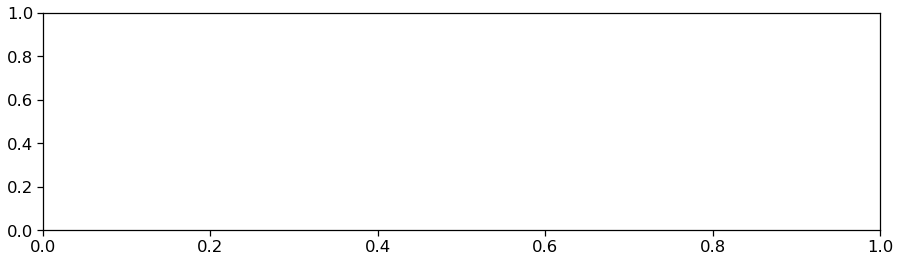

In [67]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, M_IOETV_Familiar in enumerate(ophys_experiment_ids): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF, label=targeted_structure+'_'+str(imaging_depth))
    ax.set_title(dataset.metadata['cre_line']+', ophys_session_id: '+str(ophys_session_id))
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.legend()